In [1]:
# Market prediction with machine learning 
# Simple one 

In [2]:
import pandas as pd

In [3]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv')

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 13 columns):
Date      2609 non-null object
AAPL.O    2516 non-null float64
MSFT.O    2516 non-null float64
INTC.O    2516 non-null float64
AMZN.O    2516 non-null float64
GS.N      2516 non-null float64
SPY       2516 non-null float64
.SPX      2516 non-null float64
.VIX      2516 non-null float64
EUR=      2609 non-null float64
XAU=      2602 non-null float64
GDX       2516 non-null float64
GLD       2516 non-null float64
dtypes: float64(12), object(1)
memory usage: 265.1+ KB


In [26]:
raw

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.3500,NaN,NaN
1,2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.800
2,2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.700
3,2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.510
4,2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.820
5,2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.370
6,2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.6000,50.17,112.850
7,2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.3000,48.35,110.490
8,2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.4000,48.86,111.540
9,2010-01-14,29.918542,30.960,21.480,127.350,168.53,114.93,1148.46,17.63,1.4502,1142.8500,48.60,112.030


In [36]:
symbol = 'EUR='
data = pd.DataFrame(raw[symbol])

In [38]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [13]:
lags = 5 # looking back for 5 data

In [39]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [31]:
import numpy as np

In [41]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]

In [42]:
reg

array([ 9.83507422e-01,  2.21100214e-02, -4.66748285e-02,  4.18699241e-02,
       -9.32399599e-04])

In [43]:
data['prediction'] = np.dot(data[cols], reg)

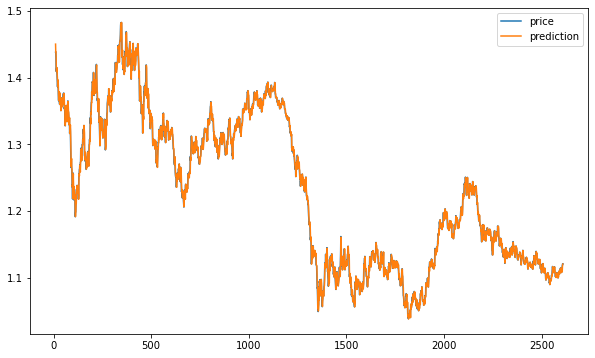

In [25]:
data[['price', 'prediction']].plot(figsize=(10, 6));

In [48]:
data.index = raw['Date'].loc[5:]

C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_core.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

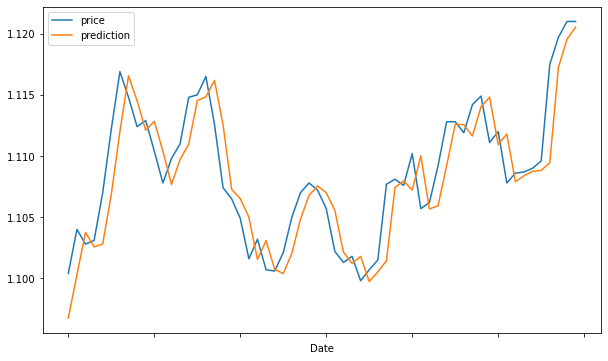

In [49]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize=(10, 6))

In [50]:
# Predicting future returns

In [51]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [64]:
data.dropna(inplace=True)

In [53]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [54]:
reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]
reg

array([-0.01659146,  0.00791021, -0.04093551,  0.00313403,  0.01523923])

C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_core.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


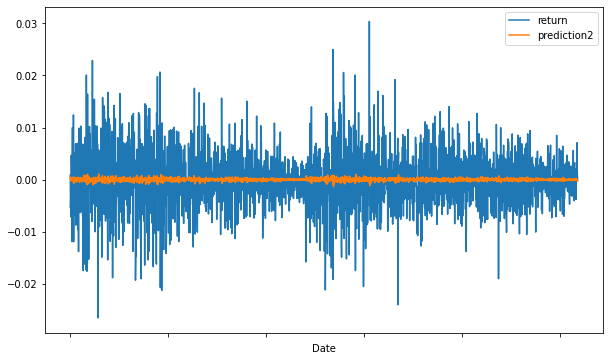

In [55]:
data['prediction2'] = np.dot(data[cols], reg)
data[['return', 'prediction2']].iloc[lags:].plot(figsize=(10, 6));

In [56]:
# Conclude that linear regression cannot predict magnitude of log returns 
# improvement 1: instead, prediction for DIRECTION of forecasted return 
# if sign of prediction is correct, product of return and prediction2 will be positive
# else, negative 

In [57]:
hits = np.sign(data['return'] * data['prediction2']).value_counts()

In [62]:
hits

 1.0    1308
-1.0    1273
 0.0      17
dtype: int64

In [63]:
hits.values[0] / sum(hits)
# hit ratio - correct predicted directions 
# slightly more accurate than random guessing?

0.5034642032332564

In [65]:
# improvement 2: use the signs for the log returns as dependent variables instead

In [66]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']), rcond=None)[0]

In [67]:
reg

array([-5.37247476, -4.2656618 , -7.00656452, -2.78442156,  0.92897295])

In [68]:
data['prediction3'] = np.sign(np.dot(data[cols], reg))

In [69]:
data['prediction3'].value_counts()

 1.0    1322
-1.0    1276
Name: prediction3, dtype: int64

In [70]:
hits = np.sign(data['return'] * data['prediction3']).value_counts()

In [71]:
hits

 1.0    1324
-1.0    1257
 0.0      17
dtype: int64

In [72]:
hits.values[0] / sum(hits)

0.5096227867590454

In [73]:
# trading logic: when prediction is positive - upward trend - long/buy
# prediction negative - downward trend - short/sell

In [74]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,prediction2,prediction3
Date,,,,,,,,,,
2010-01-18,1.4385,-0.008309,-0.000551,0.001103,-0.001310,0.006984,1.438152,0.000209,0.000191,1.0
2010-01-19,1.4298,0.000209,-0.008309,-0.000551,0.001103,-0.001310,1.438288,-0.006066,-0.000063,1.0
2010-01-20,1.4101,-0.006066,0.000209,-0.008309,-0.000551,0.001103,1.430263,-0.013874,0.000458,1.0
2010-01-21,1.4090,-0.013874,-0.006066,0.000209,-0.008309,-0.000551,1.410180,-0.000780,0.000139,1.0
2010-01-22,1.4137,-0.000780,-0.013874,-0.006066,0.000209,-0.008309,1.409093,0.003330,0.000026,1.0


In [78]:
data['strategy'] = data['prediction3'] * data['return']
data[['return', 'strategy']].sum().apply(np.exp)

return      0.779447
strategy    1.319244
dtype: float64

C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_core.py:394: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


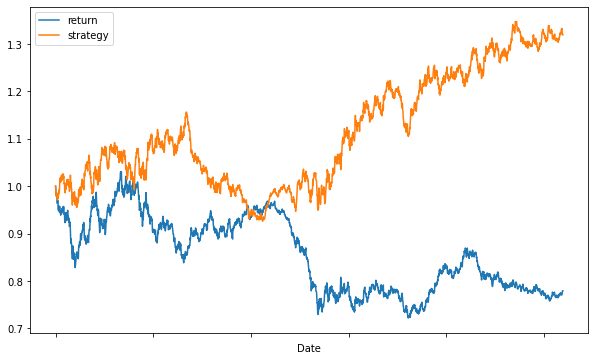

In [79]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));

In [80]:
'''
basic idea - use the signs of return within a previous period (lag)
to predict the trend of return - if positive (upward trend), then long
else, short 
'''

'\nbasic idea - use the signs of return within a previous period (lag)\nto predict the trend of return - if positive (upward trend), then long\nelse, short \n'

In [82]:
# scikit-learn - model selection - model fitting - prediction
from sklearn import linear_model

In [83]:
# logistic regression to classify market direction (+/-)
symbol = 'GLD'
data = pd.DataFrame(raw[symbol])

In [84]:
data.rename(columns={symbol: 'price'}, inplace=True)
data['return'] = np.log(data['price'] / data['price'].shift(1))
data.dropna(inplace=True)

In [85]:
lags = 3
cols = []
for lag in range(1, lags+1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [86]:
from sklearn.metrics import accuracy_score
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs', multi_class='auto', max_iter=1000)
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [88]:
data['prediction'] = lm.predict(data[cols])
data['prediction'].value_counts()

 1.0    1820
-1.0     602
Name: prediction, dtype: int64

In [89]:
hits = np.sign(data['return'].iloc[lags:] * data['prediction'].iloc[lags:]).value_counts()

In [90]:
hits

 1.0    1265
-1.0    1143
 0.0      11
dtype: int64

In [91]:
accuracy_score(data['prediction'], np.sign(data['return']))

0.523534269199009

In [92]:
data['strategy'] = data['prediction'] * data['return']
data[['return', 'strategy']].sum().apply(np.exp)

return      1.126476
strategy    2.117445
dtype: float64

<AxesSubplot:>

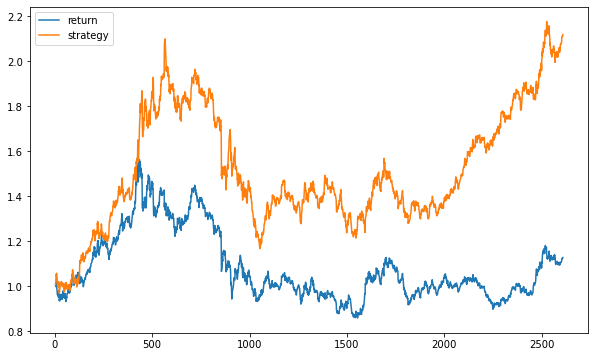

In [93]:
data[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [95]:
# notes - change the parameters in the class - use different formulas 
# use different lags  
# NEXT: using deep neural networks to predict market direction 
# NEXT: install Tensorflow and Keras **think about dependencies